# Neural Networks Learning
In this exercise, we implement the backpropagation algorithm for neural
networks and apply it to the task of handwritten digit recognition.

##  Visualizing the data
There are 5000 training examples in `ex3data1.mat`, where each training example is a 20 pixel by 20 pixel grayscale image of a digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is "unrolled" into a 400-dimensional vector. Each of these training examples becomes a single row in our data matrix $ X $. This gives us a $ 5000 \times 400 $ matrix $ X $ where every row is a training example for a handwritten digit image.

$$
X = \begin{bmatrix}
-(x^{(1)})^T- \\
-(x^{(2)})^T- \\
\vdots \\
-(x^{(m)})^T-
\end{bmatrix}
$$

The second part of the training set is a 5000-dimensional vector $ y $ that contains labels for the training set. We load the data and display it on a 2-dimensional plot by calling the function displayData.

> Note that in this dataset, the digit zero was mapped to the value 10 in order to make things more compatible with Octave/MATLAB indexing. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from utils.util4 import displayData

In [79]:
data1 = scipy.io.loadmat('./data/ex3data1.mat')
X = data1['X']
y = data1['y']
y=y.flatten()
X.shape, y.shape

((5000, 400), (5000,))

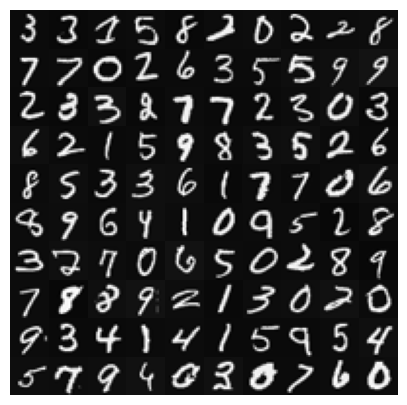

In [9]:
displayData(X, y);

## Model representation
This neural network has 3 layers – an input layer, a hidden layer and an output layer. 
Recall that our inputs are pixel values of digit images. Since the images are of size 20×20, this gives us 400 input layer units (excluding the extra bias unit which always outputs +1). 

We have been provided with a set of network parameters (Θ(1) ,Θ(2)) already trained by us. These are stored in `ex3weights.mat` and we load them into `Theta1` and `Theta2`. The parameters have dimensions that are sized for a neural network with 25 units in the second layer and 10 output units (corresponding to the 10 digit classes).

<img src="./data/3layernn.png" width="500" alt="3-Layer Neural Network Diagram">


In [5]:
weights = scipy.io.loadmat('./data/ex3weights.mat')
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']
Theta1.shape, Theta2.shape

((25, 401), (10, 26))

## Feedforward and Cost Function

Now we implement the cost function and gradient for the neural network. First, we complete the code in `nnCostFunction` to return the cost. Recall that the cost function for the neural network (without regularization) is:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} \left[ y^{(i)}_k \log(h(x^{(i)})_k) + (1 - y^{(i)}_k) \log(1 - h(x^{(i)})_k) \right]
$$

where $ h(x^{(i)}) $ is computed via feed forward and $ K = 10 $ is the total number of possible labels. Note that $ h(x^{(i)})_k = a^{(3)}_k $ is the activation (output value) of the $ k $-th output unit.

Also, recall that whereas the original labels (in the variable $ y $) were $ 1, 2, \ldots, 10 $, for the purpose of training a neural network, we need to recode the labels as vectors containing only values 0 or 1, such that:

$$
    y =
\begin{bmatrix}
1 \\
    0 \\
    0 \\
    \vdots \\
    0 \\
\end{bmatrix}
\space
or
\space
\begin{bmatrix}
    0 \\
    1 \\
    0 \\
    \vdots \\
    0
\end{bmatrix}
\space
or
\space
    y =
\begin{bmatrix}
0 \\
    0 \\
    0 \\
    \vdots \\
    1
\end{bmatrix}
$$

For example, if $ x^{(i)} $ is an image of the digit 5, then the corresponding $ y^{(i)} $ (that you should use with the cost function) should be a 10-dimensional vector with $ y_5 = 1 $, and the other elements equal to 0.

You should implement the feedforward computation that computes $ h(x^{(i)}) $ for every example $ i $ and sum the cost over all examples. Your code should also work for a dataset of any size, with any number of labels (you can assume that there are always at least $ K \geq 3 $ labels). 

We use a for-loop over the examples to compute the cost. Calling the `nnCostFunction` using the loaded set of parameters for `Theta1` and `Theta2`, we see that the cost is about 0.287629.

> Note that the matrix $ X $ contains the examples in rows (i.e., $ X(i, :) $ is the $ i $-th training example $ x^{(i)} $, expressed as a 1 vector). When you complete the code in `nnCostFunction`, you will need to add the column of 1's to the $ X $ matrix. The parameters for each unit in the neural network are represented in `Theta1` and `Theta2` as one row. Specifically, the first row of `Theta1` corresponds to the first hidden unit in the second layer.

In [64]:
def nnHypothesis(x, Theta):
    return 1 / (1 + np.exp(-x @ Theta.T))

In [65]:
X_coeff = np.hstack((np.ones((len(X), 1)), X))
print(Theta1.shape, X_coeff[0].shape)
nnHypothesis(X_coeff[0], Theta1)

(25, 401) (401,)


array([0.05036187, 0.07939572, 0.99300197, 0.51872368, 0.70524833,
       0.99649533, 0.01073784, 0.00163257, 0.99649905, 0.02040086,
       0.07178715, 0.02166121, 0.04619385, 0.05028779, 0.00421782,
       0.88700616, 0.99200482, 0.09693938, 0.84785892, 0.79771612,
       0.02382443, 0.98384703, 0.97251796, 0.94342162, 0.10721379])

In [66]:
def nnPredict(x, Thetas=[Theta1, Theta2]):
    layer = x
    for Theta in Thetas:
        if layer.ndim == 1:
            layer = np.hstack((1, layer))
        else:
            column_of_ones = np.ones((layer.shape[0], 1))
            layer = np.hstack((column_of_ones, layer))
        layer = nnHypothesis(layer, Theta)
    return layer

In [67]:
# This digit is zero, and is mapped to value 10
p_0 = nnPredict(X[0])
p_0, np.argmax(p_0)+1

(array([1.12661530e-04, 1.74127856e-03, 2.52696959e-03, 1.84032321e-05,
        9.36263860e-03, 3.99270267e-03, 5.51517524e-03, 4.01468105e-04,
        6.48072305e-03, 9.95734012e-01]),
 10)

In [70]:
prediction = nnPredict(X)
prediction.shape

(5000, 10)

In [80]:
def oneHotEncode(y, k):
    """
    One-hot encode an array `y` with `k` unique classes.
    """
    # Initialize an array of zeros with shape (len(y), k), where k is the number of classes
    one_hot = np.zeros((len(y), k), dtype=int)
    
    # Use fancy indexing to set the appropriate positions to 1
    one_hot[np.arange(len(y)), y] = 1
    
    return one_hot

# Example usage
l = [0, 1, 2, 1]
k = 3
one_hot_encoded_l = oneHotEncode(l, k)
print(one_hot_encoded_l)


[[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]]


In [115]:
def nnCostFunction(X, y, num_classes=10, epsilon=1e-12):
    total_cost = 0
    m = len(y)  # Number of training examples
    for i in range(m):
        x = X[i].copy()  # Select i-th training example
        prediction = nnPredict(x)  # Shape (10,), predicted class probabilities
        cost_x = 0  # Initialize cost for this training example
        # For each class, accumulate the cost for current training example
        for k in range(num_classes):
            y_k = 1.0 if y[i] == (k+1) else 0.0  # Ground truth for class k. Note that digit zero is represented by number 10
            prob_k = prediction[k]               # Probability prediction for class k
            # Compute cross-entropy (cost) for class k
            cost_x += -y_k * np.log(prob_k + epsilon) - (1 - y_k) * np.log(1 - prob_k + epsilon)
        # Sum up cost for each training example
        total_cost += cost_x
    # Return the average cost across all training examples
    return total_cost / m

In [116]:
%%timeit
nnCostFunction(X, y)

179 ms ± 4.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [138]:
nnCostFunction(X, y)

0.2876291651496149

In [ ]:
def nnCostFunctionVec(X, y, num_classes=10, epsilon=1e-12):
    total_cost = 0
    m = len(y)  # Number of training examples
    prediction = nnPredict(X)
    y_hot = oneHotEncode(y, num_classes+1) # 11 given that number 0 is mapped to 10
    y_hot = y_hot[:, 1:] # remove 0 since 0 is indexed to 10
    for k in range(num_classes):
        y_k = y_hot[:, k]
        prob_k = prediction[:, k]
        total_cost += -y_k @ np.log(prob_k + epsilon) - (1 - y_k) @ np.log(1 - prob_k + epsilon)
    return total_cost / m

In [118]:
%%timeit
nnCostFunctionVec(X, y)

10.9 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [137]:
nnCostFunctionVec(X, y)

0.28762916514961484

In [143]:
def nnCostFunctionVecVec(X, y, num_classes=10, epsilon=1e-12):
    m = len(y)  # Number of training examples
    prediction = nnPredict(X)
    y_hot = oneHotEncode(y, num_classes+1) # 11 given that number 0 is mapped to 10
    y_hot = y_hot[:, 1:] # remove 0 since 0 is indexed to 10
    cost = np.sum(-y_hot * np.log(prediction + epsilon) - (1 - y_hot) * np.log(1 - prediction + epsilon))
    return np.sum(cost)/m

In [120]:
%%timeit
nnCostFunctionVecVec(X, y)

12.8 ms ± 1.95 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [144]:
nnCostFunctionVecVec(X, y)

0.28762916514961484

Here is the content converted to Jupyter Markdown:

## Regularized cost function

The cost function for neural networks with regularization is given by:

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} \left( -y^{(i)}_k \log( (h_\theta(x^{(i)}))_k) - (1 - y^{(i)}_k) \log(1 - (h_\theta(x^{(i)}))_k) \right) + \frac{\lambda}{2m} \left( \sum_{j=1}^{25} \sum_{k=1}^{400} (\Theta^{(1)}_{j,k})^2 + \sum_{j=1}^{10} \sum_{k=1}^{25} (\Theta^{(2)}_{j,k})^2 \right).
$$

We assume that the neural network will only have 3 layers – an input layer, a hidden layer, and an output layer. However, the code should work for any number of input units, hidden units, and output units. While we have explicitly listed the indices above for $\Theta^{(1)}$ and $\Theta^{(2)}$ for clarity, do note that your code should in general work with $\Theta^{(1)}$ and $\Theta^{(2)}$ of any size.

Note that we should not be regularizing the terms that correspond to the bias. For the matrices `Theta1` and `Theta2`, this corresponds to the first column of each matrix. Notice that we can first compute the unregularized cost function $J$ using the existing `nnCostFunction` and then later add the cost for the regularization terms.

When we call `nnCostFunction` using the loaded set of parameters for `Theta1` and `Theta2`, and $\lambda = 1$,  we should see that the cost is about $0.383770$.

In [149]:
def nnCostFunctionReg(X, y, num_classes=10, lambda_=1, Thetas=[Theta1, Theta2], epsilon=1e-12):
    m = len(y)  # number of training examples
    probabilities = nnPredict(X) + epsilon # epsilon is added to avoid log of zero
    y_hot = oneHotEncode(y, num_classes+1)[:, 1:] # 11 classes given that  0 is mapped to 10, but then remove first column
    term1 = np.sum(-y_hot * np.log(probabilities) - (1 - y_hot) * np.log(1 - probabilities))
    term2 = 0.5 * lambda_ * np.sum([np.sum(t**2) for t in Thetas])
    return (term1+term2) / m

In [150]:
nnCostFunctionReg(X, y)

0.38448779624949664

# Backpropagation
In this part of the exercise, we implement the backpropagation algorithm to compute the gradient for the neural network cost function. We need to complete the `nnCostFunction` so that it returns an appropriate value for `grad`. Once we have computed the gradient, we will be able to train the neural network by minimizing the cost function $ J(\Theta) $ using an advanced optimizer such as `scipy.optimize.minimize`.

We first implement the backpropagation algorithm to compute the gradients for the parameters for the (unregularized) neural network. After we have verified that your gradient computation for the unregularized case is correct, we implement the gradient for the regularized neural network.

##  Sigmoid gradient
To help you get started with this part of the exercise, you will first implement the sigmoid gradient function. The gradient for the sigmoid function can be computed as:

$$
g'(z) = \frac{d}{dz} g(z) = g(z)(1 - g(z))
$$

where:

$$
\text{sigmoid}(z) = g(z) = \frac{1}{1 + e^{-z}}.
$$

When we are done, we test a few values by calling `sigmoidGradient(z)`. For large values (both positive and negative) of $ z $, the gradient should be close to 0. When $ z = 0 $, the gradient should be exactly 0.25. The code should also work with vectors and matrices. For a matrix, the function should perform the sigmoid gradient function on every element.



In [153]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoidGradient(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [158]:
z = np.array([-1, -0.5, 0, 0.5, 1])
g = sigmoidGradient(z)
print('Sigmoid gradient evaluated at: \n[-1 -0.5 0 0.5 1]')
print(g)

Sigmoid gradient evaluated at: 
[-1 -0.5 0 0.5 1]
[0.19661193 0.23500371 0.25       0.23500371 0.19661193]



## Random initialization
When training neural networks, it is important to randomly initialize the parameters for symmetry breaking. One effective strategy for random initialization is to randomly select values for $ \Theta^{(l)} $ uniformly in the range $[-\epsilon_{\text{init}}, \epsilon_{\text{init}}]$. You should use $ \epsilon_{\text{init}} = 0.12 $. This range of values ensures that the parameters are kept small and makes the learning more efficient. We complete `randInitializeWeights` to initialize the weights for $\Theta $.

In [161]:
def randInitializeWeights(L_in, L_out, epsilon_init=0.12):
    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init
    return W

randInitializeWeights(5, 2)

array([[ 0.01035527, -0.0478363 , -0.07437522, -0.10712684,  0.0837363 ,
        -0.05169734],
       [ 0.07164017,  0.00605888, -0.0329189 , -0.0371838 , -0.09439211,
        -0.01889483]])

## Backpropagation

We implement the backpropagation algorithm. Recall that the intuition behind the backpropagation algorithm is as follows. Given a training example $(x^{(t)}, y^{(t)})$, we will first run a “forward pass” to compute all the activations throughout the network, including the output value of the hypothesis $h_\Theta(x)$. Then, for each node $j$ in layer $l$, we would like to compute an “error term” $\delta_j^{(l)}$ that measures how much that node was “responsible” for any errors in our output.

For an output node, we can directly measure the difference between the network's activation and the true target value, and use that to define $\delta_j^{(3)}$ (since layer 3 is the output layer). For the hidden units, you will compute $\delta_j^{(l)}$ based on a weighted average of the error terms of the nodes in layer $(l+1)$.

In detail, here is the backpropagation algorithm (also depicted in Figure 3). You should implement steps 1 to 4 in a loop that processes one example at a time. Concretely, you should implement a for-loop for $t = 1:m$ and place steps 1-4 below inside the for-loop, with the $t$-th iteration performing the calculation on the $t$-th training example $(x^{(t)}, y^{(t)})$. Step 5 will divide the accumulated gradients by \(m\) to obtain the gradients for the neural network cost function.

1. Set the input layer's values $(a^{(1)})$ to the $t$-th training example $x^{(t)}$. Perform a feedforward pass (Figure 2), computing the activations $(z^{(2)}, a^{(2)}, z^{(3)}, a^{(3)})$ for layers 2 and 3. Note that you need to add a $+1$ term to ensure that the vectors of activations for layers $a^{(1)}$ and $a^{(2)}$ also include the bias unit. In Octave/MATLAB, if $a_1$ is a column vector, adding one corresponds to `a_1 = [1; a_1]`.

2. For each output unit $k$ in layer 3 (the output layer), set:

   $$
   \delta_k^{(3)} = (a_k^{(3)} - y_k),
   $$

   where $y_k \in \{0,1\}$ indicates whether the current training example belongs to class $k$ $(y_k = 1)$, or if it belongs to a different class $(y_k = 0)$. You may find logical arrays helpful for this task (explained in the previous programming exercise).

3. For the hidden layer $l = 2$, set:

   $$
   \delta^{(2)} = \Theta^{(2)^T} \delta^{(3)} \cdot g'(z^{(2)}),
   $$

4. Accumulate the gradient from this example using the following formula. Note that you should skip or remove $\delta_0^{(2)}$. In Octave/MATLAB, removing $\delta_0^{(2)}$ corresponds to: `delta_2 = delta_2(2:end)`.

   $$
   \Delta^{(l)} = \Delta^{(l)} + \delta^{(l+1)} (a^{(l)})^T
   $$

5. Obtain the (unregularized) gradient for the neural network cost function by dividing the accumulated gradients by $m$:

   $$
   \frac{\partial J(\Theta)}{\partial \Theta_{ij}^{(l)}} = \frac{1}{m} \Delta_{ij}^{(l)}
   $$


> **Octave/MATLAB Tip**:  
You should implement the backpropagation algorithm only after you have successfully completed the feedforward and cost functions. While implementing the backpropagation algorithm, it is often useful to use the `size` function to print out the sizes of the variables you are working with if you run into dimension mismatch errors (“nonconformant arguments” errors in Octave/MATLAB).

After you have implemented the backpropagation algorithm, the script `ex4.m` will proceed to run gradient checking on your implementation. The gradient check will allow you to increase your confidence that your code is computing the gradients correctly.

## Gradient Checking

In your neural network, you are minimizing the cost function $J(\Theta)$. To perform gradient checking on your parameters, you can imagine “unrolling” the parameters $\Theta^{(1)}, \Theta^{(2)}$ into a long vector $\theta$. By doing so, you can think of the cost function being $J(\theta)$ instead and use the following gradient checking procedure.

Suppose you have a function $f_i(\theta)$ that purportedly computes $\frac{\partial}{\partial \theta_i} J(\theta)$; you'd like to check if $f_i$ is outputting correct derivative values.

Let 
$$ \theta(i^+) = \theta + \left[\begin{array}{c} 0 \\ 0 \\ \vdots \\ \epsilon \\ \vdots \\ 0 \end{array} \right] \space and \space \theta(i^-) = \theta - \left[\begin{array}{c} 0 \\ 0 \\ \vdots \\ \epsilon \\ \vdots \\ 0 \end{array} \right] $$,

where $\theta(i^+)$ is the same as $\theta$, except its $i$-th element has been incremented by $\epsilon$. Similarly, $\theta(i^-)$ is the corresponding vector with the $i$-th element decreased by $\epsilon$.

You can now numerically verify $f_i(\theta)$'s correctness by checking, for each $i$, that:

$$
f_i(\theta) \approx \frac{J(\theta(i^+)) - J(\theta(i^-))}{2\epsilon}
$$

The degree to which these two values should approximate each other will depend on the details of $J$. But assuming $\epsilon = 10^{-4}$, you’ll usually find that the left- and right-hand sides of the above will agree to at least 4 significant digits (and often many more).

We have implemented the function to compute the numerical gradient for you in `computeNumericalGradient.m`. While you are not required to modify the file, we highly encourage you to take a look at the code to understand how it works.

In the next step of `ex4.m`, it will run the provided function `checkNNGradients.m`, which will create a small neural network and dataset that will be used for checking your gradients. If your backpropagation implementation is correct, you should see a relative difference that is less than $1 \times 10^{-9}$.

>**Practical Tip**:  
When performing gradient checking, it is much more efficient to use a small neural network with a relatively small number of input units and hidden units, thus having a relatively small number of parameters. Each dimension of $\theta$ requires two evaluations of the cost function and this can be expensive. In the function `checkNNGradients`, our code creates a small random model and dataset which is used with `computeNumericalGradient` for gradient checking. Furthermore, after you are confident that your gradient computations are correct, you should turn off gradient checking before running your learning algorithm.

>**Practical Tip**:  
Gradient checking works for any function where you are computing the cost and the gradient. Concretely, you can use the same `computeNumericalGradient.m` function to check if your gradient implementations for the other exercises are correct too (e.g., logistic regression's cost function).

Once your cost function passes the gradient check for the (unregularized) neural network cost function, you should submit the neural network gradient function (backpropagation).


In [162]:
# TODO

## Regularized Neural Networks

After you have successfully implemented the backpropagation algorithm, you will add regularization to the gradient. To account for regularization, it turns out that you can add this as an additional term after computing the gradients using backpropagation.

Specifically, after you have computed $\Delta_{ij}^{(l)}$ using backpropagation, you should add regularization using:

$$
\frac{\partial J(\Theta)}{\partial \Theta_{ij}^{(l)}} = 
\begin{cases} 
    \frac{1}{m} \Delta_{ij}^{(l)} & \text{for } j = 0 
    \\[10pt]
    \frac{1}{m} \Delta_{ij}^{(l)} + \frac{\lambda}{m} \Theta_{ij}^{(l)} & \text{for } j \ge 1
\end{cases}
$$

Note that you should not be regularizing the first column of $\Theta^{(l)}$ which is used for the bias term. Furthermore, in the parameters $\Theta_{ij}^{(l)}$, $i$ is indexed starting from 1, and $j$ is indexed starting from 0. Thus,

$$
\Theta^{(l)} = 
\begin{bmatrix}
    \Theta_{1,0}^{(l)} & \Theta_{1,1}^{(l)} & \dots \\
    \Theta_{2,0}^{(l)} & \Theta_{2,1}^{(l)} & \dots \\
    \vdots & \vdots & \ddots
\end{bmatrix}
$$

Somewhat confusingly, indexing in Octave/MATLAB starts from 1 (for both $i$ and $j$), thus `Theta1(2, 1)` actually corresponds to $\Theta_{2,0}^{(l)}$ (i.e., the entry in the second row, first column of the matrix $\Theta^{(1)}$ shown above).

Now modify your code that computes `grad` in `nnCostFunction` to account for regularization. After you are done, the `ex4.m` script will proceed to run gradient checking on your implementation. If your code is correct, you should expect to see a relative difference that is less than $1 \times 10^{-9}$.

**You should now submit your solutions.**

In [163]:
# TODO

## 2.6 Learning parameters using `fmincg`

After you have successfully implemented the neural network cost function and gradient computation, the next step of the `ex4.m` script will use `fmincg` to learn a good set of parameters.

After the training completes, the `ex4.m` script will proceed to report the training accuracy of your classifier by computing the percentage of examples it got correct. If your implementation is correct, you should see a reported training accuracy of about 95.3% (this may vary by about 1% due to the random initialization). It is possible to get higher training accuracies by training the neural network for more iterations. We encourage you to try training the neural network for more iterations (e.g., set `MaxIter` to 400) and also vary the regularization parameter $\lambda$. With the right learning settings, it is possible to get the neural network to perfectly fit the training set.

## 3 Visualizing the hidden layer

One way to understand what your neural network is learning is to visualize the representations captured by the hidden units. Informally, given a particular hidden unit, one way to visualize what it computes is to find an input $x$ that will cause it to activate (that is, to have an activation value $a_i^{(l)}$ close to 1). For the neural network you trained, notice that the $i^{th}$ row of $\Theta^{(1)}$ is a 401-dimensional vector that represents the parameter for the $i^{th}$ hidden unit. If we discard the bias term, we get a 400-dimensional vector that represents the weights from each input pixel to the hidden unit.

Thus, one way to visualize the "representation" captured by the hidden unit is to reshape this 400-dimensional vector into a $20 \times 20$ image and display it. The next step of `ex4.m` does this by using the `displayData` function, and it will show you an image (similar to Figure 4) with 25 units, each corresponding to one hidden unit in the network.

In your trained network, you should find that the hidden units correspond roughly to detectors that look for strokes and other patterns in the input.

### 3.1 Optional (ungraded) exercise

In this part of the exercise, you will get to try out different learning settings for the neural network to see how the performance of the neural network varies with the regularization parameter $\lambda$ and the number of training steps (the `MaxIter` option when using `fmincg`).

Neural networks are very powerful models that can form highly complex decision boundaries. Without regularization, it is possible for a neural network to "overfit" a training set so that it obtains close to 100% accuracy on the training set but does not perform as well on new examples it has not seen before. You can set the regularization $\lambda$ to a smaller value and the `MaxIter` parameter to a higher number of iterations to observe this for yourself.

You will also be able to see, for yourself, the changes in the visualizations of the hidden units when you change the learning parameters $\lambda$ and `MaxIter`.

You do not need to submit any solutions for this optional (ungraded) exercise.